In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection
import pandas as pd
import torch

In [27]:
data = pd.read_csv('data.csv')

x = data.drop(columns = ['Unnamed: 0','y'])
y = data['y']

x = x.to_numpy()
y = y.to_numpy()
y[y!=1] = 0

print('Instancias:', np.shape(x)[0])
print('Dimensiones:', np.shape(x)[1])
print('Instancias/Dimensiones:', int(np.shape(x)[0]/np.shape(x)[1]))
print('Clases:', np.unique(y, return_counts=True)[0], 'Instancias por clase:', np.unique(y, return_counts=True)[1])

Instancias: 11500
Dimensiones: 178
Instancias/Dimensiones: 64
Clases: [0 1] Instancias por clase: [9200 2300]


In [28]:
scaler = sklearn.preprocessing.StandardScaler()
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.7)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [97]:
model = torch.nn.Sequential(
    torch.nn.Conv1d(1, 5, kernel_size=8, stride=1, padding=1, padding_mode='zeros'),
    torch.nn.MaxPool1d(kernel_size=3),
    torch.nn.Conv1d(5, 1, kernel_size=2, stride=1, padding=1, padding_mode='zeros'),
    torch.nn.Linear(58, 2)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) #lr: learning rate
epochs = 120
loss_arr = np.zeros(epochs)
f1_train = np.zeros(epochs)
f1_test = np.zeros(epochs)

for epoch in range(epochs):
    x_new = np.expand_dims(x_train, 1) 
    inputs = torch.autograd.Variable(torch.Tensor(x_new).float())
    targets = torch.autograd.Variable(torch.Tensor(y_train).long())
    
    optimizer.zero_grad()
    out = model(inputs)
    out = out.squeeze(dim=1)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    
    values, y_predicted = torch.max(out.data, 1)
    loss_arr[epoch] = loss.item()
    f1_train[epoch] = sklearn.metrics.f1_score(y_train, y_predicted, average='macro')
    
    x_new = np.expand_dims(x_test, 1)
    inputs_test = torch.autograd.Variable(torch.Tensor(x_new).float())
    out_test = model(inputs_test)
    out_test = out_test.squeeze(dim=1)
    values, y_predt = torch.max(out_test.data, 1)
    f1_test[epoch] = sklearn.metrics.f1_score(y_test, y_predt, average='macro')

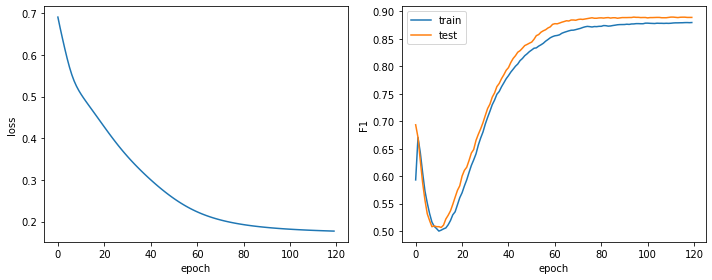

In [98]:
plt.figure(figsize = (10,4))

plt.subplot(121)
plt.plot(np.arange(epochs), loss_arr)
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(122)
plt.plot(np.arange(epochs), f1_train, label='train')
plt.plot(np.arange(epochs), f1_test, label='test')
plt.xlabel('epoch')
plt.ylabel('F1')
plt.legend()

plt.tight_layout()

In [99]:
print('F1 Score Max:', max(np.max(f1_test),np.max(f1_train)))

F1 Score Max: 0.8897636589347828
